In [12]:
import pandas as pd
import numpy as np
import gensim
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


In [13]:
csv_file_path = 'G:\projectMachineLearningTest\mental_health.csv'

data = pd.read_csv(csv_file_path)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB


In [14]:
sentences = [text.split() for text in data['text']]

model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

def get_word2vec_embedding(text):
    words = text.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

embeddings = np.array([get_word2vec_embedding(text) for text in data['text']])

## Classfication with original data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, data['label'], test_size=0.3, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(classification_report(y_test, y_pred_log_reg))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))

# MLP (Multilayer Perceptron)
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("MLP Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp)}")
print(classification_report(y_test, y_pred_mlp))


c:\Users\tranh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.8964736716702406
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      4284
           1       0.88      0.92      0.90      4110

    accuracy                           0.90      8394
   macro avg       0.90      0.90      0.90      8394
weighted avg       0.90      0.90      0.90      8394

SVM:
Accuracy: 0.9105313319037408
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4284
           1       0.90      0.92      0.91      4110

    accuracy                           0.91      8394
   macro avg       0.91      0.91      0.91      8394
weighted avg       0.91      0.91      0.91      8394

MLP Classifier:
Accuracy: 0.8943292828210626
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      4284
           1       0.87      0.92      0.90      4110

    accuracy                           0.89      8394

## With decomposition

In [16]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings)

lda = LDA(n_components=1)
labels = data['label']
lda_embeddings = lda.fit_transform(embeddings, labels)

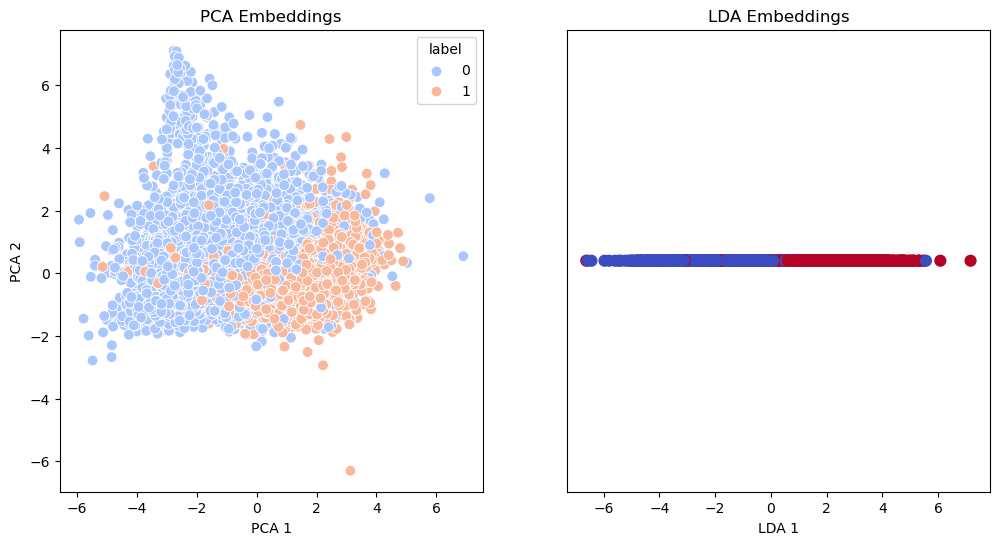

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_embeddings[:, 0], y=pca_embeddings[:, 1], hue=labels, palette='coolwarm', s=60)
plt.title('PCA Embeddings')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(1, 2, 2)
plt.scatter(lda_embeddings, [0] * len(lda_embeddings), c=labels, cmap='coolwarm', s=60)
plt.title('LDA Embeddings')
plt.xlabel('LDA 1')
plt.yticks([])
plt.show()

In [18]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(pca_embeddings, labels, test_size=0.2, random_state=42)
X_train_lda, X_test_lda = train_test_split(lda_embeddings, test_size=0.2, random_state=42)

# 1. Logistic Regression
logistic_model_pca = LogisticRegression()
logistic_model_pca.fit(X_train_pca, y_train)
y_pred_pca_logistic = logistic_model_pca.predict(X_test_pca)

logistic_model_lda = LogisticRegression()
logistic_model_lda.fit(X_train_lda, y_train)
y_pred_lda_logistic = logistic_model_lda.predict(X_test_lda)

# 2. SVM
svm_model_pca = SVC()
svm_model_pca.fit(X_train_pca, y_train)
y_pred_pca_svm = svm_model_pca.predict(X_test_pca)

svm_model_lda = SVC()
svm_model_lda.fit(X_train_lda, y_train)
y_pred_lda_svm = svm_model_lda.predict(X_test_lda)

# 3. MLP
mlp_model_pca = MLPClassifier(hidden_layer_sizes=(100,))
mlp_model_pca.fit(X_train_pca, y_train)
y_pred_pca_mlp = mlp_model_pca.predict(X_test_pca)

mlp_model_lda = MLPClassifier(hidden_layer_sizes=(100,))
mlp_model_lda.fit(X_train_lda, y_train)
y_pred_lda_mlp = mlp_model_lda.predict(X_test_lda)

print("Logistic Regression (PCA):", accuracy_score(y_test, y_pred_pca_logistic))
print("Logistic Regression (LDA):", accuracy_score(y_test, y_pred_lda_logistic))

print("SVM (PCA):", accuracy_score(y_test, y_pred_pca_svm))
print("SVM (LDA):", accuracy_score(y_test, y_pred_lda_svm))

print("MLP (PCA):", accuracy_score(y_test, y_pred_pca_mlp))
print("MLP (LDA):", accuracy_score(y_test, y_pred_lda_mlp))


Logistic Regression (PCA): 0.8332737669764118
Logistic Regression (LDA): 0.897962830593281
SVM (PCA): 0.8375625446747677
SVM (LDA): 0.8974267333809864
MLP (PCA): 0.8400643316654753
MLP (LDA): 0.8968906361686919


## RNN

note: đ hiểu sao có tensorflow mà thư viện keras lại lỗi

In [21]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

MAX_SEQUENCE_LENGTH = max([len(embedding) for embedding in embeddings])

X = tf.keras.preprocessing.sequence.pad_sequences(embeddings, maxlen=MAX_SEQUENCE_LENGTH, dtype='float32', padding='post', value=0.0)

X = np.expand_dims(X, axis=1)  # Thay đổi kích thước từ (number_of_samples, features) thành (number_of_samples, 1, features)

y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LSTM_UNITS = 128

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(LSTM_UNITS, input_shape=(X.shape[1], X.shape[2]), return_sequences=False))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


c:\Users\tranh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,377 (458.50 KB)

 Trainable params: 117,377 (458.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8331 - loss: 0.4015 - val_accuracy: 0.8969 - val_loss: 0.2812
Epoch 2/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8847 - loss: 0.2908 - val_accuracy: 0.8999 - val_loss: 0.2709
Epoch 3/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8916 - loss: 0.2707 - val_accuracy: 0.8999 - val_loss: 0.2660
Epoch 4/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8955 - loss: 0.2670 - val_accuracy: 0.8997 - val_loss: 0.2666
Epoch 5/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8958 - loss: 0.2665 - val_accuracy: 0.9017 - val_loss: 0.2583
